# Описание данных

В файле содержатся данные спортивного медиа по просмотрам определенных страниц в определенный период
Файл содержит поля:
1. event_id - идентификатор события просмотра страницы
2. device_id - идентификатор устройства пользователя
3. mobile_device_flag - содержит значения 1 или 0. Если юзер смотрел страницы с мобильного телефона, то будет 1, иначе 0
4. page_type - тип просматриваемой страницы: main - главная страница сайта, news - новости, post - посты в блогах, online - страница матча, tags - страница тега

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

<h1>1. Чтение файла и ознакомление с данными</h1>

In [6]:
df = pd.read_csv("sports_camp_test_data.csv")
df.head(5)

,event_id,device_id,mobile_device_flag,page_type,time_msk
0,b654bc23-025d-4278-ade6-986856412f00,58751027-3d82-4ca4-8ffc-0119ffec929f,1,post,2024-06-01 03:00:10
1,0c658c7a-0747-44a9-9121-45086cb86720,5be0f54f-3558-421c-94b3-176bc9cad105,1,news,2024-06-01 03:00:12
2,14e0f1ef-0599-42fd-b7db-f3604a22aceb,872a6cbe-91e4-4948-87ca-06575d5ef44e,1,main,2024-06-01 03:00:17
3,8a50d096-0a0d-4ff0-9ab3-1baf137494b2,3a7cb951-55cd-4de6-8946-caa436c217ff,1,post,2024-06-01 03:00:18
4,0b56a28c-d5b1-4f71-9a41-443084b578fe,cc843d62-1763-43e2-9422-fbc3fffdeca8,1,news,2024-06-01 03:00:20


In [7]:
df.tail(5) 

,event_id,device_id,mobile_device_flag,page_type,time_msk
339135,bed7ab71-5af1-485e-92b4-2c755f1d1516,c2ccd8a1-5fc0-4d84-b829-ccb9125309f1,1,post,2024-05-28 20:48:55
339136,a9469f53-469c-4693-beec-ffafbf81d0bf,6d84f233-b89b-47a8-bb68-9263833740cf,0,news,2024-05-28 20:48:56
339137,61e38377-8da8-4afa-b600-0b12d50fbac0,9f8ba689-4f79-4a98-90c0-51e2fa482ffd,1,tags,2024-05-28 20:48:58
339138,0b139e2d-1b2f-4a79-abbd-b834bea0b84d,bb0cd6cd-3fdf-4454-82a5-882011d44105,1,news,2024-05-28 20:49:02
339139,6a4e2451-134d-4502-a669-bcf5f34d2386,f2dc6e54-6922-47de-9775-4d3e5d39c39e,0,tags,2024-05-28 20:49:02


<h1>2. Проверка форматов данных и их преобразование</h1>

In [9]:
df.dtypes

event_id              object
device_id             object
mobile_device_flag     int64
page_type             object
time_msk              object
dtype: object

In [10]:
df['mobile_device_flag'] = df['mobile_device_flag'].astype(bool)
df['time_msk'] = pd.to_datetime(df['time_msk'])
df.dtypes

event_id                      object
device_id                     object
mobile_device_flag              bool
page_type                     object
time_msk              datetime64[ns]
dtype: object

<h1>3. Проверка качества данных</h1>

   **А) Поиск пропусков**

In [13]:
df.isnull().sum().sum ()

0

<i>пропусков не выявлено<i>

**Б) Поиск и удаление дубликатов**

In [16]:
duplicateRows = df[df.duplicated (keep=False)]
duplicateRows

,event_id,device_id,mobile_device_flag,page_type,time_msk
223,2ea2609d-74ed-4b2a-85d8-a0010c2df865,d8e52388-ac11-4e3f-974a-b15c087ac135,True,online,2024-06-02 02:08:03
224,2ea2609d-74ed-4b2a-85d8-a0010c2df865,d8e52388-ac11-4e3f-974a-b15c087ac135,True,online,2024-06-02 02:08:03
225,2ea2609d-74ed-4b2a-85d8-a0010c2df865,d8e52388-ac11-4e3f-974a-b15c087ac135,True,online,2024-06-02 02:08:03
477,3c49a047-a556-4ef2-a3d8-c17843acc439,6214295d-784f-430c-a712-66e6f7aec3f5,False,online,2024-06-01 15:00:11
478,3c49a047-a556-4ef2-a3d8-c17843acc439,6214295d-784f-430c-a712-66e6f7aec3f5,False,online,2024-06-01 15:00:11
...,...,...,...,...,...
338564,795b4720-e12d-43d6-b500-82453ed4abd6,023e325c-52c6-43b2-a2c1-fbdc5c765b36,False,post,2024-05-28 20:42:40
338569,599d0e53-6430-451c-acf6-00bae4a8fc78,75f9a140-6fa7-4e08-b27b-8cdee742ea29,False,post,2024-05-30 16:31:18
338571,599d0e53-6430-451c-acf6-00bae4a8fc78,75f9a140-6fa7-4e08-b27b-8cdee742ea29,False,post,2024-05-30 16:31:18
338730,2e0e29f3-3e48-4d3c-9672-c8e2f2f857c7,5d641831-52c2-4cb6-a6ad-ee38ed22aa71,True,post,2024-05-28 20:42:46


In [17]:
df.drop_duplicates ()

,event_id,device_id,mobile_device_flag,page_type,time_msk
0,b654bc23-025d-4278-ade6-986856412f00,58751027-3d82-4ca4-8ffc-0119ffec929f,True,post,2024-06-01 03:00:10
1,0c658c7a-0747-44a9-9121-45086cb86720,5be0f54f-3558-421c-94b3-176bc9cad105,True,news,2024-06-01 03:00:12
2,14e0f1ef-0599-42fd-b7db-f3604a22aceb,872a6cbe-91e4-4948-87ca-06575d5ef44e,True,main,2024-06-01 03:00:17
3,8a50d096-0a0d-4ff0-9ab3-1baf137494b2,3a7cb951-55cd-4de6-8946-caa436c217ff,True,post,2024-06-01 03:00:18
4,0b56a28c-d5b1-4f71-9a41-443084b578fe,cc843d62-1763-43e2-9422-fbc3fffdeca8,True,news,2024-06-01 03:00:20
...,...,...,...,...,...
339135,bed7ab71-5af1-485e-92b4-2c755f1d1516,c2ccd8a1-5fc0-4d84-b829-ccb9125309f1,True,post,2024-05-28 20:48:55
339136,a9469f53-469c-4693-beec-ffafbf81d0bf,6d84f233-b89b-47a8-bb68-9263833740cf,False,news,2024-05-28 20:48:56
339137,61e38377-8da8-4afa-b600-0b12d50fbac0,9f8ba689-4f79-4a98-90c0-51e2fa482ffd,True,tags,2024-05-28 20:48:58
339138,0b139e2d-1b2f-4a79-abbd-b834bea0b84d,bb0cd6cd-3fdf-4454-82a5-882011d44105,True,news,2024-05-28 20:49:02


<i>дублирующие строки удалены</i>

**В) Обнаружение выбросов**

<Axes: xlabel='time_msk'>

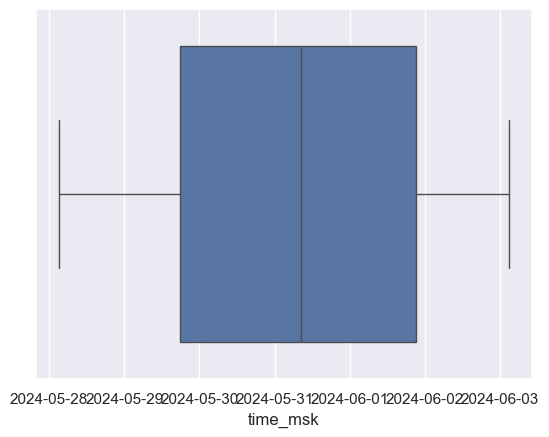

In [20]:
sns.boxplot(x=df['time_msk'])

Выбросов по дате не обнаружено, т.к. на визуализации нет точек за пределами "усов" графика.

<h1>3. Трансформация данных</h1>

In [23]:
#расчет двух новых столбцов для дальнейшей визуализации и анализа данных:

df['hour'] = df['time_msk'].dt.hour   #значение часа в сутках из общего времени
df.insert(6, 'counter', 1)            #числовое обозначение каждого события
df

,event_id,device_id,mobile_device_flag,page_type,time_msk,hour,counter
0,b654bc23-025d-4278-ade6-986856412f00,58751027-3d82-4ca4-8ffc-0119ffec929f,True,post,2024-06-01 03:00:10,3,1
1,0c658c7a-0747-44a9-9121-45086cb86720,5be0f54f-3558-421c-94b3-176bc9cad105,True,news,2024-06-01 03:00:12,3,1
2,14e0f1ef-0599-42fd-b7db-f3604a22aceb,872a6cbe-91e4-4948-87ca-06575d5ef44e,True,main,2024-06-01 03:00:17,3,1
3,8a50d096-0a0d-4ff0-9ab3-1baf137494b2,3a7cb951-55cd-4de6-8946-caa436c217ff,True,post,2024-06-01 03:00:18,3,1
4,0b56a28c-d5b1-4f71-9a41-443084b578fe,cc843d62-1763-43e2-9422-fbc3fffdeca8,True,news,2024-06-01 03:00:20,3,1
...,...,...,...,...,...,...,...
339135,bed7ab71-5af1-485e-92b4-2c755f1d1516,c2ccd8a1-5fc0-4d84-b829-ccb9125309f1,True,post,2024-05-28 20:48:55,20,1
339136,a9469f53-469c-4693-beec-ffafbf81d0bf,6d84f233-b89b-47a8-bb68-9263833740cf,False,news,2024-05-28 20:48:56,20,1
339137,61e38377-8da8-4afa-b600-0b12d50fbac0,9f8ba689-4f79-4a98-90c0-51e2fa482ffd,True,tags,2024-05-28 20:48:58,20,1
339138,0b139e2d-1b2f-4a79-abbd-b834bea0b84d,bb0cd6cd-3fdf-4454-82a5-882011d44105,True,news,2024-05-28 20:49:02,20,1


<h1>4. Визуализация</h1>

Text(0.5, 1.0, 'Mobile and Not Mobile Events per Page Types')

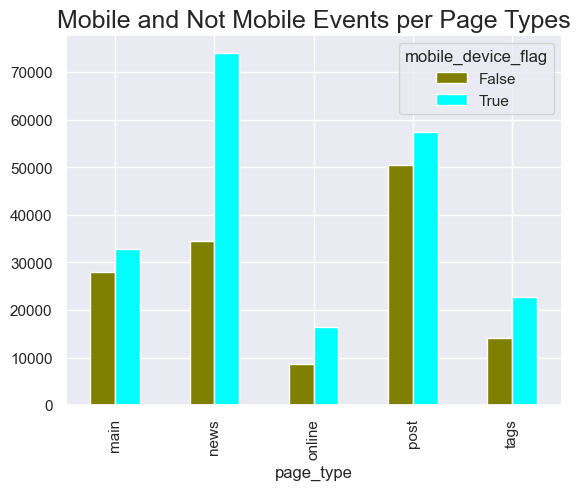

In [25]:
#проверка корреляции типа устройства и категорий страниц

pivot_table_1 = pd.pivot_table(df, index = 'page_type' , columns = 'mobile_device_flag', values = 'counter', aggfunc = 'sum')
pivot_table_1.plot(kind='bar',color = ['olive', 'cyan'])
plt.title('Mobile and Not Mobile Events per Page Types', fontsize = 18)

<h4>Выводы:</h4>

1. В целом больше просмотров с мобильных устройств по всем категориям страниц.
2. Категории "Новости", "Онлайн" и "Тэги" просматривают примерно в 2 раза чаще с мобильных устройств, нежели с десктопных.
По остальным категоиям разница в используемых устройствах не так ярко выражена.

In [27]:
#расчет новых значений для дальнейшего анализа

pivot_table_1['Sum'] = pivot_table_1[True] + pivot_table_1[False]                       #общее кол-во событий по категориям страниц
pivot_table_1['F_Perc'] = (pivot_table_1[False] / pivot_table_1['Sum'] *100).round(1)   #процентное соотношение по использованию типов устройств для каждой стораницы
pivot_table_1['T_Perc'] = (pivot_table_1[True] / pivot_table_1['Sum'] *100).round(1)
pivot_table_1['Delta_Perc'] = (((pivot_table_1[True] - pivot_table_1[False]) / pivot_table_1[True]) *100).round(1) 

In [28]:
pivot_table_1.sort_values(by= 'Delta_Perc')  #отсортируем по разнице значений в процентах

mobile_device_flag,False,True,Sum,F_Perc,T_Perc,Delta_Perc
page_type,,,,,,
post,50555,57455,108010,46.8,53.2,12.0
main,28048,32779,60827,46.1,53.9,14.4
tags,14180,22691,36871,38.5,61.5,37.5
online,8587,16368,24955,34.4,65.6,47.5
news,34476,74001,108477,31.8,68.2,53.4


<i>Таблица еще раз подтверждает, что просмотр новостей и онлайн страниц матчей происходит в 2 из 3 случаев с мобильных устройств</i>

Text(0.5, 1.0, 'Page type events per Devices')

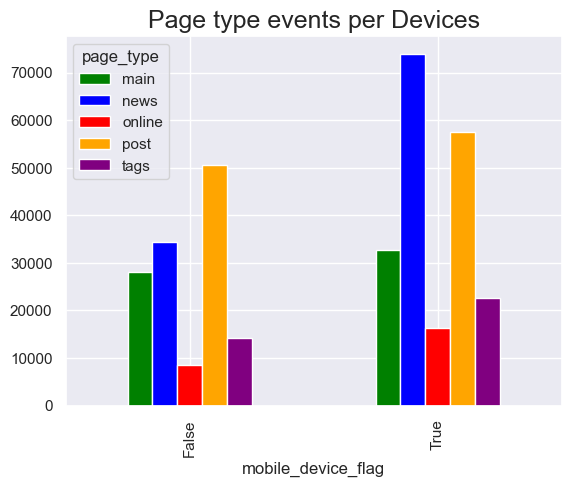

In [30]:
#проверка значимости категорий страниц для типов устройств

pivot_table_2 = pd.pivot_table(df, index = 'mobile_device_flag' , columns = 'page_type', values = 'counter', aggfunc = 'sum')
pivot_table_2.plot(kind='bar', color = ['green', 'blue', 'red', 'orange', 'purple'])

plt.title('Page type events per Devices', fontsize = 18)

<h4>Выводы:</h4>

1. С мобильных устройств больше всего просматривают новости и посты, с десктопных - в первую очередь посты, во вторую новости. 
2. Наименее популярная категория для всех типов устройств - страницы онлайн матчей.

<Axes: title={'center': 'Events by Page Types'}, ylabel='Sum'>

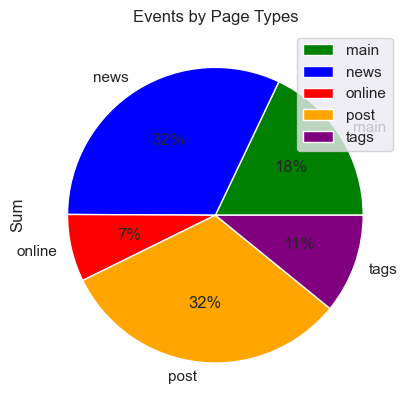

In [32]:
#рассмотрим общую популярность разных типов страниц

pivot_table_1.groupby(['page_type']). sum ().plot(kind='pie', y='Sum', autopct='%1.0f%%',
    colors = ['green', 'blue', 'red', 'orange', 'purple'],
    title='Events by Page Types')

<h4>Выводы:</h4>

1. Равное соотношение постов и новостей - это 2 самые популярные категории.

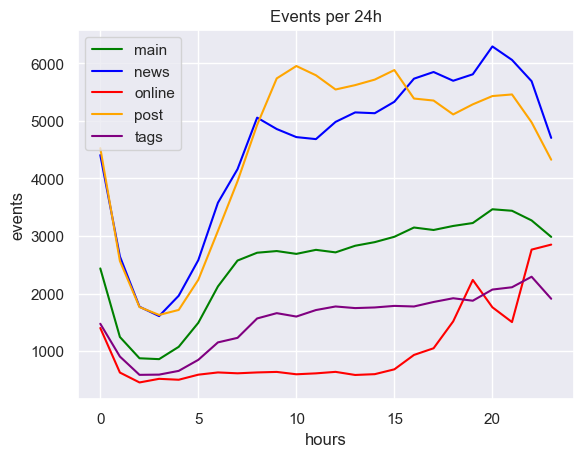

In [34]:
#рассмотрим распредление всех посещений в течении суток

pivot_table_4 = pd.pivot_table(df, index = 'hour' , columns = 'page_type', values = 'counter', aggfunc = 'sum')

plt.plot(pivot_table_4['main'],label='main', color='green')
plt.plot(pivot_table_4['news'], label='news', color='blue')
plt.plot(pivot_table_4['online'], label='online', color='red')
plt.plot(pivot_table_4['post'], label='post', color='orange')
plt.plot(pivot_table_4['tags'], label='tags', color='purple')
plt.title('Events per 24h')
plt.xlabel('hours')
plt.ylabel('events')
plt.legend()

<h4>Выводы:</h4>

1. Самая "мертвая зона" для всех катгорий - с 01:00 до 04:00 мск
2. Теги и главная страница имеют практически идентичную динамику изменения активности в течение дня
3. Активность страниц матчей поднимается только в вечернее время (время основных матчей). Достигает пика к 22-23:00.
4. Посты активнее всего читают с 09:00 до 16:00, после активность идет на спад, уступая первенство новостям, активность посещения которых растет в течение всего дня и достигает пика к 20:00.
5. После 19:00 для страниц с матчами есть резкое понижение активности, совпадающее с ростом посещений новостей и постов. Вероятно, это связано с тем, что в перерывах между матчами появляется большое кол-во новостей и публикаций, забирающих внимание пользователей.
6. Активность по главной странице изменяется в течение дня довольно равномерно, без резких скачков, увеличиваясь к вечеру.

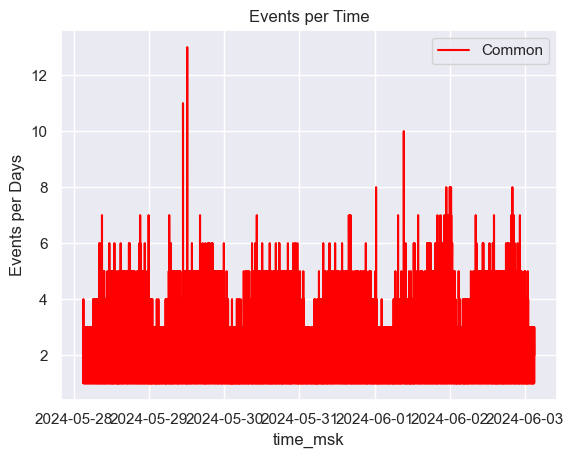

In [36]:
#оценка активности в течение всего периода

pivot_table_5 = pd.pivot_table(df, index = 'time_msk' , columns = 'mobile_device_flag', values = 'counter', aggfunc = 'sum')
pivot_table_5 = pivot_table_5.fillna(0)
pivot_table_5['Common'] = pivot_table_5[False] + pivot_table_5[True]

plt.plot(pivot_table_5['Common'],label='Common', color='red')

plt.title('Events per Time')
plt.xlabel('time_msk')
plt.ylabel('Events per Days')
plt.legend()

<h4>Выводы:</h4>

1. Наблюдается аномальная активность в неоторые дни. Связано это, по все видимости, со значимыми спортивными событями, в частности с финалом ЛЧ 01.06